In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from watermark import watermark

In [2]:
# ML specific imports
import xgboost as XGB

import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
print(watermark(packages="numpy,pandas,xgboost,sklearn"))

numpy  : 1.21.5
pandas : 1.4.3
xgboost: 1.7.3
sklearn: 1.2.1



In [4]:
df_rnd_train = pd.read_parquet('../datasets/df_rnd_train.parquet')
df_rnd_test = pd.read_parquet('../datasets/df_rnd_test.parquet')
df_rnd_val = pd.read_parquet('../datasets/df_rnd_val.parquet')

In [5]:
df_rnd_train.describe()

,ABI_C07,ABI_C09,ABI_C13,GLM,MRMS_REFC
count,3.425076e+07,3.425076e+07,3.425076e+07,3.425076e+07,3.425076e+07
mean,2.361155e+02,1.260405e+02,1.645376e+02,8.951849e-01,1.758879e+01
std,2.510230e+01,8.980260e+01,6.481879e+01,4.379092e+00,1.061956e+01
min,1.973053e+02,1.857928e+02,1.857274e+02,0.000000e+00,-1.100000e+01
25%,2.460168e+02,2.133735e+02,2.145525e+02,0.000000e+00,1.208333e+01
50%,2.538741e+02,2.218346e+02,2.247381e+02,0.000000e+00,1.836364e+01
75%,2.635166e+02,2.342157e+02,2.442675e+02,7.407407e-02,2.661111e+01
max,3.483505e+02,2.629400e+02,3.124393e+02,7.032593e+02,7.200000e+01


In [6]:
train_col = ['ABI_C07', 'ABI_C09', 'ABI_C13', 'GLM']
test_col =['MRMS_REFC']

In [7]:
X_train = df_rnd_train[train_col]
y_train = df_rnd_train[test_col]

X_test = df_rnd_test[train_col]
y_test = df_rnd_test[test_col]

# XGBoost

In [8]:
XGBr = XGB.XGBRegressor(eval_metric='rmse')

XGBr.fit(
    X_train.values, 
    y_train)

xgb_y_pred = XGBr.predict(X_test.values)

In [9]:
mean_squared_error(y_test.values, xgb_y_pred.ravel())

76.50872

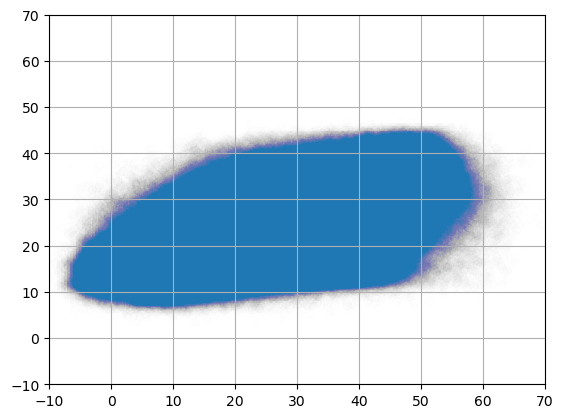

In [10]:
plt.scatter(y_test.values, xgb_y_pred.ravel(), alpha =0.002 )
plt.xlim([-10,70])
plt.ylim([-10,70])
plt.grid(True)

# KNN Regression

In [21]:
KNNr = KNeighborsRegressor(n_neighbors=11)

KNNr.fit(
    X_train.values, 
    y_train)

knn_y_pred = KNNr.predict(X_test.values)

In [22]:
mean_squared_error(y_test.values, knn_y_pred.ravel())

84.26038

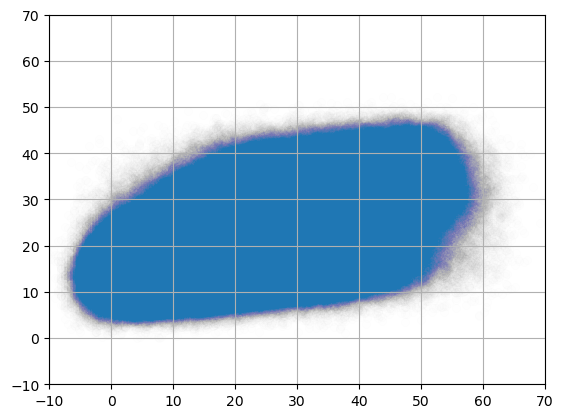

In [23]:
plt.scatter(y_test.values, knn_y_pred.ravel(), alpha =0.002 )
plt.xlim([-10,70])
plt.ylim([-10,70])
plt.grid(True)

# Linear Regression

In [14]:
LR = LinearRegression()

In [15]:
LR.fit(
    X_train.values, 
    y_train)

LR_y_pred = LR.predict(X_test.values)

In [16]:
mean_squared_error(y_test.values, LR_y_pred.ravel())

98.66473

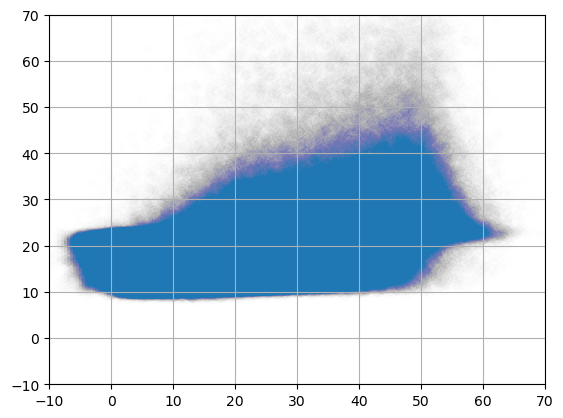

In [17]:
plt.scatter(y_test.values, LR_y_pred.ravel(), alpha =0.002)
plt.xlim([-10,70])
plt.ylim([-10,70])
plt.grid(True)